In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv('db/master_spotify.csv',  encoding="ISO-8859-1")
df.tail()

row                      id                                       track  \
0    0  6e40mgJiCid5HRAGrbpGA6                          I Want It That Way   
1    1  4r8lRYnoOGdEi6YyI5OC1o                                 Bye Bye Bye   
2    2  1Je1IMUlBXcx1Fz0WE7oPT                                     Wannabe   
3    3  3QHONiXGMGU3z68mQInncF             I'll Be Missing You (feat. 112)   
4    4  1di1BEgJYzPvXUuinsYJGP  Everybody (Backstreet's Back) - Radio Edit   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0        0.2160         0.689       213600   0.702           0.00000  F#   
1        0.0408         0.614       200560   0.928           0.00104  G#   
2        0.1010         0.768       173027   0.864           0.00000   B   
3        0.0522         0.862       301520   0.479           0.00126   G   
4        0.0352         0.731       225360   0.853           0.00000  A#   

   liveness  loudness   mode  speechiness    tempo  time_signature  valence  \
0    0.1590    -5.642  Minor       0.0261   99.031             NaN    0.484   
1    0.0845    -4.806  Minor       0.0516  172.656             NaN    0.879   
2    0.1620    -6.145  Major       0.0324  110.008             NaN    0.891   
3    0.5890    -9.199  Major       0.0646  109.878             NaN    0.925   
4    0.2680    -4.219  Minor       0.0363  108.016             NaN    0.605   

                                          track_href  
0  https://api.spotify.com/v1/tracks/6e40mgJiCid5...  
1  https://api.spotify.com/v1/tracks/4r8lRYnoOGdE...  
2  https://api.spotify.com/v1/tracks/1Je1IMUlBXcx...  
3  https://api.spotify.com/v1/tracks/3QHONiXGMGU3...  
4  https://api.spotify.com/v1/tracks/1di1BEgJYzPv...

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 16 columns):
id                  3332 non-null object
track               5341 non-null object
acousticness        5341 non-null float64
danceability        5341 non-null float64
duration_ms         5341 non-null int64
energy              5341 non-null float64
instrumentalness    5341 non-null float64
key                 5341 non-null object
liveness            5341 non-null float64
loudness            5341 non-null float64
mode                5341 non-null object
speechiness         5341 non-null float64
tempo               5341 non-null float64
time_signature      3004 non-null float64
valence             5341 non-null float64
track_href          3193 non-null object
dtypes: float64(10), int64(1), object(5)
memory usage: 667.7+ KB


In [162]:
df = df.drop(columns=['row'])

In [163]:
df.dtypes

id                   object
track                object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
track_href           object
dtype: object

# Model 1

In [164]:
X = df.energy.values.reshape(-1,1)
y = df.tempo.values.reshape(-1,1)

In [165]:
print("Shape: ", X.shape, y.shape)
X

Shape:  (5341, 1) (5341, 1)


array([[0.702],
       [0.928],
       [0.864],
       ...,
       [0.816],
       [0.699],
       [0.478]])

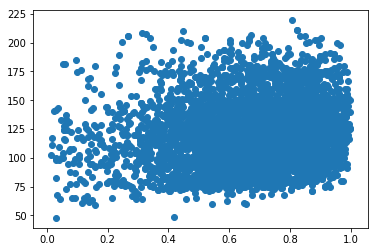

In [166]:
plt.scatter(X, y)

In [167]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [168]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[20.13143872]]
y-axis intercept:  [107.09425777]


In [170]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.0148]]
Max X Value: [[0.998]]


In [171]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

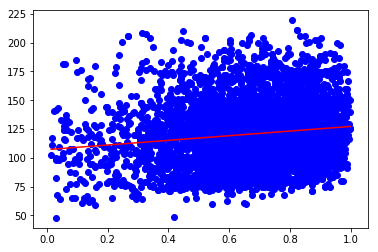

In [172]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

# Model 2 - Loudness

use for features: acousticness, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, valence

use for label: danceability

In [209]:
df.count()

id                  3332
track               5341
acousticness        5341
danceability        5341
duration_ms         5341
energy              5341
instrumentalness    5341
key                 5341
liveness            5341
loudness            5341
mode                5341
speechiness         5341
tempo               5341
time_signature      3004
valence             5341
track_href          3193
dtype: int64

In [318]:
df.columns

Index(['id', 'track', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'track_href'],
      dtype='object')

In [319]:
X = df.drop(['danceability', 'id', 'track', 'key', 'mode', 'time_signature', 'track_href'], axis=1)
y = df['danceability'].copy()
print(X.shape, y.shape)

(5341, 9) (5341,)


In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [321]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [322]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Loudness Training Score: {training_score}")
print(f"Loudness Testing Score: {testing_score}")

Loudness Training Score: 0.3081528220962776
Loudness Testing Score: 0.29621382483625214


In [326]:
from sklearn import metrics

predictions = model.predict(X_test)
metrics.mean_squared_error(y_test, predictions)**(1/2)

0.12727654223123216

In [327]:
metrics.r2_score(y_test, predictions)

0.29621382483625214

In [328]:
from sklearn.externals import joblib

joblib.dump(model, 'models/danceability_model.pkl')

['models/danceability_model.pkl']

In [329]:
X_test

acousticness  duration_ms  energy  instrumentalness  liveness  loudness  \
3365      0.431000       239800   0.758          0.001770    0.3770    -4.589   
1945      0.130000       178560   0.672          0.002830    0.1090    -7.436   
5336      0.022000       181714   0.506          0.000000    0.0933    -7.755   
4245      0.012000       243573   0.896          0.000000    0.1960    -2.935   
168       0.720000       200864   0.293          0.000006    0.3260   -12.507   
4162      0.023000       285653   0.814          0.000000    0.0972    -5.146   
4284      0.602000       178760   0.566          0.000216    0.2020    -7.230   
422       0.037200       186987   0.683          0.000000    0.1370    -2.881   
4473      0.142000       214027   0.700          0.000002    0.3830    -6.852   
296       0.007010       199080   0.866          0.000000    0.2570    -3.804   
297       0.016300       225920   0.872          0.001740    0.0924    -9.156   
3408      0.005520       262333   0.682          0.000029    0.0589    -4.095   
1477      0.037700       215973   0.691          0.563000    0.0657    -7.595   
418       0.293000       193377   0.897          0.000000    0.0722    -4.481   
1049      0.006550       220160   0.946          0.000035    0.0524    -5.281   
3714      0.049000       233478   0.698          0.000000    0.3090    -4.165   
1820      0.007230       259683   0.633          0.000000    0.2460    -8.224   
84        0.078300       274707   0.434          0.000049    0.1400   -14.918   
1902      0.768000       283872   0.216          0.897000    0.0832   -13.818   
4326      0.200000       250706   0.774          0.000000    0.4040    -4.983   
2549      0.036200       585000   0.792          0.881000    0.1010    -8.211   
705       0.043300       168908   0.566          0.000000    0.1120    -5.704   
3826      0.176000       231173   0.668          0.000104    0.0732    -5.561   
3271      0.118000       195075   0.588          0.000000    0.1380    -4.889   
4296      0.218000       228226   0.736          0.000000    0.0595    -5.005   
2099      0.073900       301240   0.663          0.003510    0.0814    -3.639   
5088      0.039300       320267   0.505          0.000000    0.0923    -8.926   
3194      0.059600       289559   0.922          0.000002    0.1260    -4.087   
1672      0.082900       192026   0.619          0.000000    0.0533    -8.324   
1188      0.013200       330920   0.778          0.666000    0.1090    -5.485   
...            ...          ...     ...               ...       ...       ...   
5240      0.105000       231271   0.833          0.000000    0.3590    -5.555   
2439      0.000482       282101   0.905          0.000489    0.6860    -4.897   
2276      0.005170       212027   0.592          0.000015    0.1240    -6.334   
3691      0.346000       242733   0.547          0.000302    0.1320    -7.273   
3454      0.141000       230453   0.588          0.000006    0.1370    -7.015   
3089      0.342000       178026   0.750          0.363000    0.0804    -6.599   
476       0.172000       256600   0.464          0.000007    0.0546    -8.560   
4601      0.148000       214960   0.900          0.000297    0.3400    -6.406   
3897      0.007480       220626   0.821          0.001500    0.1150    -5.864   
312       0.017100       233200   0.887          0.000602    0.0706    -6.449   
508       0.022700       170820   0.954          0.000001    0.2140    -4.257   
166       0.778000       217973   0.235          0.000000    0.1870   -10.121   
4595      0.287000       300000   0.722          0.186000    0.2830    -8.373   
4627      0.481000       456640   0.572          0.000532    0.1050   -12.324   
1024      0.037200       201027   0.946          0.000000    0.3520    -4.591   
1221      0.123000       236760   0.793          0.000000    0.0805    -5.332   
1835      0.015100       255632   0.732          0.000119    0.0897    -5.450   
2407      0.000015       311217   0.9

Text(0.5,1,'Residual Plot')

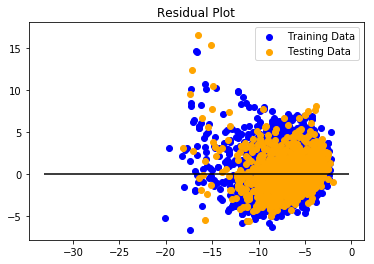

In [240]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

# Model 3 - Danceability

# Change mode data type from 'object' to 'float'

In [241]:
df.count()

id                  3332
track               5341
acousticness        5341
danceability        5341
duration_ms         5341
energy              5341
instrumentalness    5341
key                 5341
liveness            5341
loudness            5341
mode                5341
speechiness         5341
tempo               5341
time_signature      3004
valence             5341
track_href          3193
dtype: int64

In [242]:
X = df[["acousticness", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence" ]]
y = df["danceability"].values.reshape(-1, 1)
print(X.shape, y.shape)    

(5341, 9) (5341, 1)


In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [244]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [245]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f" Danceability Training Score: {training_score}")
print(f" Danceability Score: {testing_score}")

 Danceability Training Score: 0.3081528220962776
 Danceability Score: 0.29621382483625214


Text(0.5,1,'Residual Plot')

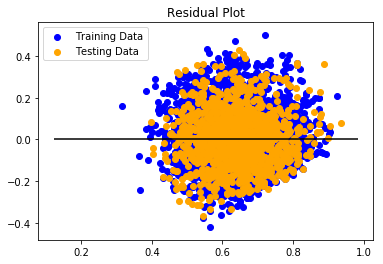

In [246]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [ ]:
import pickle


In [298]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [299]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [300]:
from keras.utils import to_categorical

# One-hot encoding


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [302]:
from keras.models import Sequential

model = Sequential()

from keras.layers import Dense
number_inputs = 9
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [304]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [305]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [306]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

ValueError: Error when checking target: expected dense_3 to have shape (2,) but got array with shape (220,)

# Model 4 - Tempo

In [247]:
df.count()

id                  3332
track               5341
acousticness        5341
danceability        5341
duration_ms         5341
energy              5341
instrumentalness    5341
key                 5341
liveness            5341
loudness            5341
mode                5341
speechiness         5341
tempo               5341
time_signature      3004
valence             5341
track_href          3193
dtype: int64

In [294]:
X = df[["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness","valence"]]
y = df["tempo"].values.reshape(-1, 1)
print(X.shape, y.shape) 

(5341, 9) (5341, 1)


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [296]:
model = LinearRegression()

In [297]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f" Tempo Training Score: {training_score}")
print(f" Tempo Score: {testing_score}")

 Tempo Training Score: 0.06582886509549501
 Tempo Score: 0.05414996362782887


In [284]:
df.dtypes

id                   object
track                object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
track_href           object
dtype: object

Text(0.5,1,'Residual Plot')

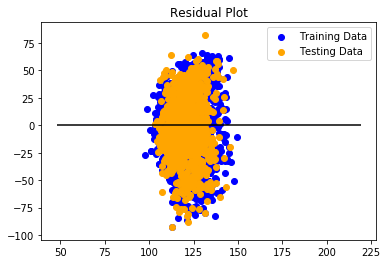

In [253]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

# Model 5 - Acousticness

In [258]:
#df['acousticness']
df.count()

id                  3332
track               5341
acousticness        5341
danceability        5341
duration_ms         5341
energy              5341
instrumentalness    5341
key                 5341
liveness            5341
loudness            5341
mode                5341
speechiness         5341
tempo               5341
time_signature      3004
valence             5341
track_href          3193
dtype: int64

In [277]:
X = df[["danceability", "energy", "liveness"]]
y = df["acousticness"].values.reshape(-1, 1)
print(X.shape, y.shape) 

(5341, 3) (5341, 1)


In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()

In [279]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f" Tempo Training Score: {training_score}")
print(f" Tempo Score: {testing_score}")
# Score hardly changes remvoing one feature (9) down to (3)

 Tempo Training Score: 0.3716786795661322
 Tempo Score: 0.37482480068195234
